# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

## Perform standard imports and load datasets
For this exercise we'll look at monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.
Source: https://fred.stlouisfed.org/series/POPTHM

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR, ARResults

# Load the US population dataset
df = pd.read_csv("D:/ML-Datasets/Udemy-TimeSeries/uspopulation.csv", index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

# Check the data load
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Plot the source data

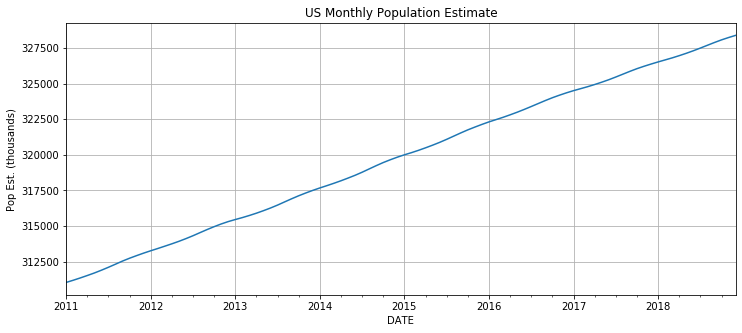

In [13]:
title = 'US Monthly Population Estimate'
ylabel = 'Pop Est. (thousands)'

df['PopEst'].plot(figsize=(12, 5), title=title, grid=True).autoscale(axis='x', tight=True)
plt.ylabel(ylabel);

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [14]:
# Check the length of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [15]:
# We will set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

## Fit an AR(1) Model

In [16]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1, method='mle')
print(f"Lag : {AR1fit.k_ar}")
print(f"Coefficients : {AR1fit.params}")

Lag : 1
Coefficients : const        148.163961
L1.PopEst      0.999536
dtype: float64


<div class="alert alert-info"><strong>NOTE: </strong>There's a slight difference between the object returned by the Holt-Winters Exponential Smoothing <tt>.fit()</tt> method and that returned by AR. The Holt-Winters object uses <tt>.forecast()</tt> for predicted values, while AR uses <tt>.predict()</tt>.</div>

In [22]:
# The general format for obtaining predictions
predictions1 = AR1fit.predict(start=len(train), end=(len(df) - 1), dynamic=False).rename('AR(1) Predictions')
predictions1

2018-01-01    326374.750802
2018-02-01    326371.503110
2018-03-01    326368.256926
2018-04-01    326365.012247
2018-05-01    326361.769074
2018-06-01    326358.527406
2018-07-01    326355.287241
2018-08-01    326352.048579
2018-09-01    326348.811420
2018-10-01    326345.575763
2018-11-01    326342.341606
2018-12-01    326339.108951
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [25]:
# Comparing predictions to expected values
for index in range(len(predictions1)):
    print(F"predicted={predictions1[index]}, expected={test['PopEst'][index]}")

predicted=326374.75080150185, expected=326527
predicted=326371.50311037066, expected=326669
predicted=326368.2569259071, expected=326812
predicted=326365.0122474122, expected=326968
predicted=326361.7690741873, expected=327134
predicted=326358.5274055342, expected=327312
predicted=326355.2872407547, expected=327502
predicted=326352.0485791513, expected=327698
predicted=326348.8114200265, expected=327893
predicted=326345.5757626834, expected=328077
predicted=326342.34160642524, expected=328241
predicted=326339.1089505556, expected=328393


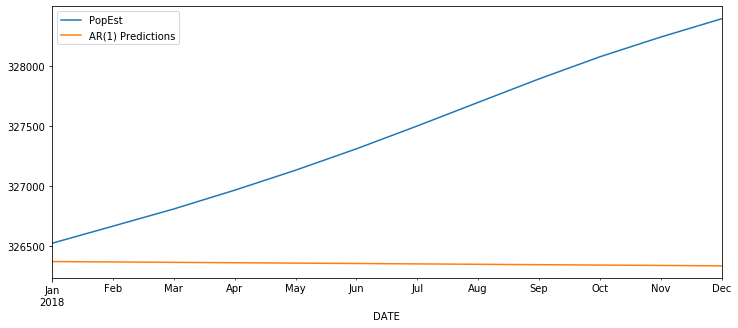

In [28]:
# Let us visualize it
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True, figsize=(12, 5));

## Fit an AR(2) Model

In [30]:
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2, method='mle')
print(f"Lag : {AR2fit.k_ar}")
print(f"Coefficients : {AR2fit.params}")

Lag : 2
Coefficients : const        135.427091
L1.PopEst      1.996654
L2.PopEst     -0.997079
dtype: float64


In [31]:
# The general format for obtaining predictions
predictions2 = AR2fit.predict(start=len(train), end=(len(df) - 1), dynamic=False).rename('AR(2) Predictions')
predictions2

2018-01-01    326530.308756
2018-02-01    326678.872339
2018-03-01    326823.638570
2018-04-01    326964.557036
2018-05-01    327101.579105
2018-06-01    327234.657942
2018-07-01    327363.748526
2018-08-01    327488.807661
2018-09-01    327609.793988
2018-10-01    327726.668002
2018-11-01    327839.392060
2018-12-01    327947.930390
Freq: MS, Name: AR(2) Predictions, dtype: float64

In [32]:
# Comparing predictions to expected values
for index in range(len(predictions2)):
    print(F"predicted={predictions2[index]}, expected={test['PopEst'][index]}")

predicted=326530.30875555443, expected=326527
predicted=326678.8723386631, expected=326669
predicted=326823.638569979, expected=326812
predicted=326964.55703586986, expected=326968
predicted=327101.5791046793, expected=327134
predicted=327234.65794218366, expected=327312
predicted=327363.74852624023, expected=327502
predicted=327488.8076606222, expected=327698
predicted=327609.793988038, expected=327893
predicted=327726.6680023315, expected=328077
predicted=327839.39205985924, expected=328241
predicted=327947.93039004394, expected=328393


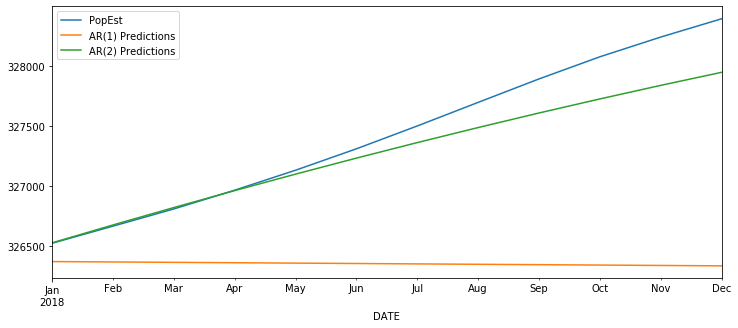

In [34]:
# Let us visualize it
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True, figsize=(12, 5));

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [35]:
model = AR(train['PopEst'])
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.124616
L1.PopEst      2.291094
L2.PopEst     -2.181772
L3.PopEst      1.654362
L4.PopEst     -1.188893
L5.PopEst      0.668833
L6.PopEst     -0.756480
L7.PopEst      0.748546
L8.PopEst     -0.161906
L9.PopEst      0.027470
L10.PopEst     0.015553
L11.PopEst    -0.117111
dtype: float64


In [36]:
# The general format for obtaining predictions
predictions = ARfit.predict(start=len(train), end=(len(df) - 1), dynamic=False).rename('AR Predictions')
predictions

2018-01-01    326521.652026
2018-02-01    326652.641942
2018-03-01    326780.434470
2018-04-01    326915.365244
2018-05-01    327065.424613
2018-06-01    327230.097847
2018-07-01    327404.744936
2018-08-01    327586.319976
2018-09-01    327768.558889
2018-10-01    327942.521259
2018-11-01    328100.732565
2018-12-01    328240.721721
Freq: MS, Name: AR Predictions, dtype: float64

In [37]:
# Comparing predictions to expected values
for index in range(len(predictions)):
    print(F"predicted={predictions[index]}, expected={test['PopEst'][index]}")

predicted=326521.65202635125, expected=326527
predicted=326652.6419417542, expected=326669
predicted=326780.43446990073, expected=326812
predicted=326915.36524423404, expected=326968
predicted=327065.42461279134, expected=327134
predicted=327230.0978470486, expected=327312
predicted=327404.7449359304, expected=327502
predicted=327586.3199764856, expected=327698
predicted=327768.55888947117, expected=327893
predicted=327942.52125936194, expected=328077
predicted=328100.7325653998, expected=328241
predicted=328240.72172108985, expected=328393


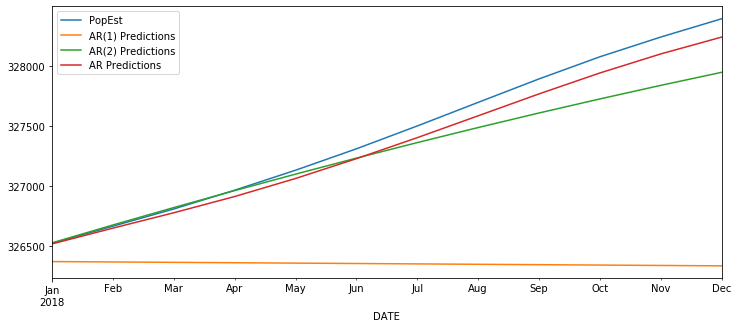

In [38]:
# Let us visualize it
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions.plot(legend=True, figsize=(12, 5));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [40]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR']
preds = [predictions1, predictions2, predictions]  # these are variables, not strings!

for index in range(3):
    error = mean_squared_error(test['PopEst'], preds[index])
    print(f'{labels[index]} Error: {error}')

AR(1) Error: 1542491.0610504877
AR(2) Error: 52706.46529593951
AR Error: 9486.521477947046


## Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

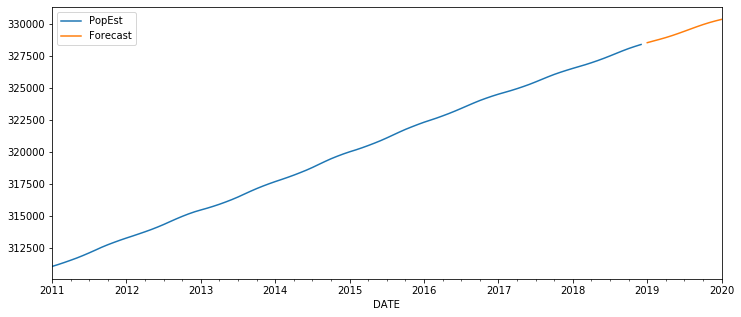

In [42]:
# First retrain the model on the full dataset
model = AR(df['PopEst'])

# Next fit the model - lag 11 was decided by AR 
ARfit = model.fit(maxlag=11, method='mle')

# Make predictions - we will predict for 12 months, because our test set was for 12 months
fcast = ARfit.predict(start=len(df), end=(len(df)+12), dynamic=False).rename('Forecast')

# Visualize the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True, figsize=(12, 5));